# Lab5 Creating a BoW SVM Classifier from MELD and Tweets

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

To classify your conversation with Eliza, you need to build a SVM emotion classifier using a TFIDF Bag-of-Words representation using all the data from MELD and WASSA Tweets. In this case you can use al the train, test and development data to train the final classifier as you are going to test it on your conversation.

In [26]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
import pickle
import sklearn
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
import lab5_util as util

### 1. Loading the tweet data set

In [4]:
# LOAD THE TWEET TRAINING DATA
dftweets_train = pd.read_csv('../lab3.machine_learning/data/wassa/training/all.train.tsv', sep='\t')

In [6]:
# TO LOAD THE TWEET TEST DATA
dftweets_test = pd.read_csv('../lab3.machine_learning/data/wassa/testing/all.test.tsv', sep='\t')

In [7]:
# LOAD THE TWEET DEVELOPMENT DATA
dftweets_dev = pd.read_csv('../lab3.machine_learning/data/wassa/development/all.dev.tsv', sep='\t')

Get the training texts and labels

In [8]:
# Get the tweets from the training data
tweet_train_instances = list(dftweets_train['Tweet'])

# Get the labels from the training data
tweet_train_labels = list(dftweets_train['Label'])

# Get the tweets from the test data
tweet_test_instances = list(dftweets_test['Tweet'])

# Get the labels from the test data
tweet_test_labels = list(dftweets_test['Label'])

# Get the tweets from the development data
tweet_dev_instances = list(dftweets_dev['Tweet'])

# Get the labels from the development data
tweet_dev_labels = list(dftweets_dev['Label'])

## 2. Loading the MELD data set

In [21]:
# LOAD THE MELD TRAINING DATA
dfmeld_train = pd.read_csv('../lab3.machine_learning/data/MELD/train_sent_emo.csv')
util.replace_weird_tokens_in_meld(dfmeld_train)

In [22]:
# LOAD THE MELD TEST DATA
dfmeld_test = pd.read_csv('../lab3.machine_learning/data/MELD/test_sent_emo.csv')
util.replace_weird_tokens_in_meld(dfmeld_test)

In [23]:
# LOAD THE MELD DEVELOPMENT DATA
dfmeld_dev = pd.read_csv('../lab3.machine_learning/data/MELD/dev_sent_emo.csv')
util.replace_weird_tokens_in_meld(dfmeld_dev)

In [24]:
# Get the tweets from the training data
meld_train_instances = list(dfmeld_train['Utterance'])

# Get the labels from the training data
meld_train_labels = list(dfmeld_train['Emotion'])

# Get the tweets from the test data
meld_test_instances = list(dfmeld_test['Utterance'])

# Get the labels from the test data
meld_test_labels = list(dfmeld_test['Emotion'])

# Get the tweets from the development data    
meld_dev_instances = list(dfmeld_dev['Utterance'])

# Get the labels from the development data
meld_dev_labels = list(dfmeld_dev['Emotion'])

## 3. Combining the training data

In [25]:
# CREATING A SINGLE TRAINING DATA SET
combined_train_instances = tweet_train_instances + tweet_test_instances + tweet_dev_instances + meld_train_instances + meld_test_instances + meld_dev_instances
combined_train_labels = tweet_train_labels + tweet_test_labels + tweet_dev_labels + meld_train_labels + meld_test_labels + meld_dev_labels

Total of values 21157


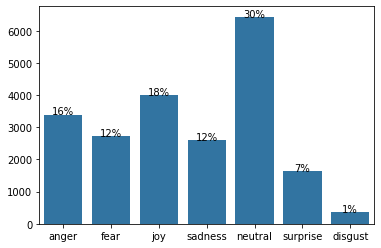

In [28]:
# ANALYSE THE DISTRIBUTION OVER THE EMOTION LABELS
emotion_counts = Counter(combined_train_labels)
util.plot_labels_with_counts(list(emotion_counts.keys()), list(emotion_counts.values()))

In [35]:
# TRAIN AN SVM CLASSIFIER WITH A BOW TFIDF DATA REPRESENTATION

# Create a BoW vectorizer
frequency_threshold = 5
bow_vec = CountVectorizer(min_df=frequency_threshold, # If a token appears fewer times than this, across all documents, it will be ignored
                             tokenizer=nltk.word_tokenize, # we use the nltk tokenizer
                             stop_words=stopwords.words('english')) # stopwords are removed
# Create a TFIDF transformer
tfidf_transformer = TfidfTransformer()

# Fit the vectorizer and transformer and transfrom the training data
x_train = tfidf_transformer.fit_transform(bow_vec.fit_transform(combined_train_instances))

# Train the Support Vector Machine
svm_linear_clf = svm.LinearSVC(max_iter=2000)
svm_linear_clf.fit(x_train, combined_train_labels)

c:\Users\xelfj\AppData\Local\Programs\Python\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


LinearSVC(max_iter=2000)

## 4. Saving the final combined classifier to disk

In [37]:
# Save the countvectorizer
filename_vectorizer = 'models/vectorizer.sav'
pickle.dump(bow_vec, open(filename_vectorizer, 'wb'))

# Save the tfidf transformer
filename_tfidftransformer = 'models/tfidf_transformer.sav'
pickle.dump(tfidf_transformer, open(filename_tfidftransformer, 'wb'))

# Save the classifier to disk
filename_classifier = 'models/svm_linear_clf_bow.sav'
pickle.dump(svm_linear_clf, open(filename_classifier,'wb'))

# End of notebook